In [1]:
import pandas as pd
import numpy as np

 

from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
df_train = pd.read_fwf('X_train.txt',header=None)  ## loading train data
df_train.shape  ##(7352, 561)


(7352, 561)

In [3]:
df_train.describe()   ## Provides the summary staistics of numrical vaiables
##  all the variables are numrical 

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [3]:
chk_missing_value=df_train.apply(lambda x: sum(x.isnull()), axis=0)
sum(chk_missing_value==0)  ## NO variable has missing values

561

In [4]:
print(df_train.isnull().any().any())
##print(test.isnull().any().any())

False


In [5]:
features=pd.read_fwf("features.txt",header=None)  ## Feature names
features.head(10)

,0
0,1 tBodyAcc-mean()-X
1,2 tBodyAcc-mean()-Y
2,3 tBodyAcc-mean()-Z
3,4 tBodyAcc-std()-X
4,5 tBodyAcc-std()-Y
5,6 tBodyAcc-std()-Z
6,7 tBodyAcc-mad()-X
7,8 tBodyAcc-mad()-Y
8,9 tBodyAcc-mad()-Z
9,10 tBodyAcc-max()-X


In [6]:
y_train=pd.read_fwf("y_train.txt",header=None)  ## train class label

In [7]:
y_train[0].value_counts() ## Viewing the  class distribution in training set data

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: 0, dtype: int64

In [8]:
df_test = pd.read_fwf('X_test.txt',header=None)  ## loading test data
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.275860,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.051413,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,0.022332,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262273,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277146,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288372,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [9]:
print(df_test.shape)
print(df_test.isnull().any().any())

(2947, 561)
False


In [10]:
y_test=pd.read_fwf("y_test.txt",header=None)  ## test class label

In [11]:
y_test[0].value_counts()

## This shows that the classification problem is multiclass and also data set is balanced.

6    537
5    532
1    496
4    491
2    471
3    420
Name: 0, dtype: int64

In [12]:
##Machine learning part

In [13]:

nb_model = GaussianNB()

In [14]:
nb_model.fit(df_train, y_train[0])

GaussianNB()

In [15]:
nb_model.score(df_test,y_test) ## model accuracy

0.77061418391584657

In [21]:
## Support vector machine, using 3 fold cross validation for parameter tuning 



tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1,0.01,0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]

svm = GridSearchCV(SVC(), tuned_parameters, cv=3)



svm.fit(df_train, y_train[0])



GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
svm.best_params_


{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
svm.score(df_test,y_test)  ## Accuracy of SVM model

0.96267390566677979

In [16]:
  ## Principl component analysis for dimensionality reduction. 
    

pca_train= PCA()
pca_train.fit(df_train)

##pca_train = pca_train.transform(df_train)

PCA(copy=True, n_components=None, whiten=False)

In [17]:
var= pca_train.explained_variance_ratio_


In [18]:
# Now calculating the cumulative Variance explained
cum_var=np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100)
cum_var[1:65]

array([ 67.45,  71.58,  73.45,  75.14,  76.41,  77.59,  78.66,  79.63,
        80.49,  81.25,  81.92,  82.5 ,  83.06,  83.56,  84.03,  84.5 ,
        84.93,  85.36,  85.77,  86.16,  86.54,  86.89,  87.23,  87.56,
        87.88,  88.18,  88.47,  88.76,  89.04,  89.32,  89.58,  89.84,
        90.08,  90.31,  90.53,  90.75,  90.96,  91.17,  91.37,  91.56,
        91.75,  91.93,  92.11,  92.28,  92.44,  92.6 ,  92.76,  92.91,
        93.06,  93.2 ,  93.34,  93.48,  93.61,  93.74,  93.86,  93.98,
        94.1 ,  94.21,  94.32,  94.43,  94.53,  94.63,  94.73,  94.83])

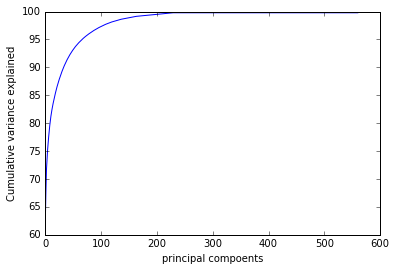

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cum_var)
plt.ylabel("Cumulative variance explained")
plt.xlabel("principal compoents")

## It  65 componets explains alomost 95 percent of variance in data

In [20]:
## NOw performing pca with 65 components

pca = PCA(n_components=65)
pca.fit(df_train)

pca_train = pca.transform(df_train)
pca_test = pca.transform(df_test)

pca_test.shape



(2947, 65)

In [22]:
nb_model_pca = GaussianNB()

In [23]:
nb_model_pca.fit(pca_train, y_train[0])
nb_model_pca.score(pca_test,y_test) ## model accuracy of naive bayes after reducing dimension

## We see the accuracy improved 

0.87580590430946725

In [39]:
## Support vector machine on dimension reduced data , using 3 fold cross validation for parameter tuning  



tuned_parameters_pca = [{'kernel': ['rbf'], 'gamma': [0.1,0.01,0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]

svm_pca = GridSearchCV(SVC(), tuned_parameters_pca, cv=3)



svm_pca.fit(pca_train, y_train[0])

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
svm_pca.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [41]:

svm_pca.score(pca_test,y_test) 

## SVM model accuracy after reducing dimension using PCA

0.94061757719714967

In [43]:
## Random forests



In [44]:
rf_model = RandomForestClassifier(n_estimators=501, oob_score=True)





In [46]:
rf_model.fit(df_train, y_train[0])
rf_model.score(df_test,y_test)

0.92975907702748561

In [49]:
## Viewing the feature importance
feat_importances = rf_model.feature_importances_
indices = np.argsort(feat_importances)[::-1]##  sorting the feature indices in descending order


In [50]:
feat_importances[indices]


array([ 0.03085079,  0.0305172 ,  0.02922103,  0.02915389,  0.02748138,
        0.02553096,  0.02387736,  0.02342588,  0.02290399,  0.01623984,
        0.01386023,  0.01081371,  0.01048121,  0.00960825,  0.00947361,
        0.00943038,  0.00930744,  0.00922816,  0.00873158,  0.00825693,
        0.00822697,  0.00811096,  0.00788929,  0.00769559,  0.00755556,
        0.00745049,  0.00718778,  0.00714661,  0.0070203 ,  0.00690196,
        0.00681315,  0.00681188,  0.00680106,  0.00676528,  0.00671638,
        0.00653898,  0.00630725,  0.00621867,  0.00609059,  0.00598086,
        0.00591948,  0.00591877,  0.00583141,  0.00574741,  0.00570512,
        0.00566221,  0.00565954,  0.00556315,  0.0055117 ,  0.00549182,
        0.00546386,  0.00542529,  0.00513609,  0.00495163,  0.00490793,
        0.00478287,  0.00478114,  0.0047006 ,  0.0045426 ,  0.00451585,
        0.00445008,  0.00442922,  0.00421174,  0.00414231,  0.00404772,
        0.00404103,  0.00400864,  0.00397871,  0.00392698,  0.00

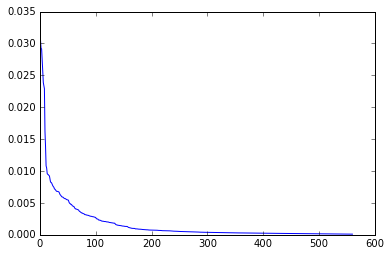

In [51]:
plt.plot(feat_importances[indices])

In [52]:
## Now, running random forest with 100 most informative features


reduced_df_train=df_train.iloc[ :,indices[0:100] ]
reduced_df_test=df_test.iloc[ :,indices[0:100] ]




In [53]:
reduced_rf = RandomForestClassifier(n_estimators=501, oob_score=True)


reduced_rf.fit(reduced_df_train, y_train[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [54]:
reduced_rf.score(reduced_df_test,y_test[0])

0.90668476416694943

In [75]:

predicted = reduced_rf.predict(reduced_df_test)
accuracy = accuracy_score(y_test, predicted)
accuracy

0.90668476416694943

In [76]:

confusion_matrix(y_test, predicted)

array([[480,  13,   3,   0,   0,   0],
       [ 46, 418,   7,   0,   0,   0],
       [ 16,  47, 357,   0,   0,   0],
       [  0,   0,   0, 404,  87,   0],
       [  0,   0,   0,  56, 476,   0],
       [  0,   0,   0,   0,   0, 537]])